In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
raw = pd.read_csv('train_loan.csv', index_col = 'Loan_ID')
raw.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
raw.count

<bound method DataFrame.count of           Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                           
LP001002    Male      No          0      Graduate            No   
LP001003    Male     Yes          1      Graduate            No   
LP001005    Male     Yes          0      Graduate           Yes   
LP001006    Male     Yes          0  Not Graduate            No   
LP001008    Male      No          0      Graduate            No   
LP001011    Male     Yes          2      Graduate           Yes   
LP001013    Male     Yes          0  Not Graduate            No   
LP001014    Male     Yes         3+      Graduate            No   
LP001018    Male     Yes          2      Graduate            No   
LP001020    Male     Yes          1      Graduate            No   
LP001024    Male     Yes          2      Graduate            No   
LP001027    Male     Yes          2      Graduate           NaN   
LP001028    Male     Yes     

In [5]:
raw.apply(lambda x: sum(x.isnull()), axis = 0)


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
raw.dtypes


Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
##################...[I] Variable Identification...###################
#TYPES OF VARIABLES
#Predictor variables
 #1) Gender 
 #2) Married
 #3) Dependents
 #4) Education
 #5) Self_Employed
 #6) Credit_History *int
 #7) Property_Area
 #8) ApplicantIncome
 #9) CoapplicantIncome
 #10) LoanAmount 
 #11) Loan_Amount_Term *float

#Target variables
 #1) Loan_Status
    

In [ ]:
#DATA TYPES
#Character
 #1) Gender 
 #2) Married
 #3) Dependents
 #4) Education 
 #5) Self_Employed
 #6) Property_Area
 #7) Loan_Status [TARGET/OUTPUT]

#Numeric 
 #1) ApplicantIncome
 #2) CoapplicantIncome
 #3) LoanAmount
 #4) Credit_History *int
 #5) Loan_Amount_Term *float

In [14]:
#VARIABLE CATEGORY
# [A] Categorical 
 #1) Gender 
 #2) Married
 #3) Dependents
 #4) Education
 #5) Self_Employed
 #6) Credit_History *int
 #7) Property_Area
 #8) Loan_Status [LABEL/TARGET/OUTPUT]
 #9) Loan_Amount_Term *float

# [B] Continuous 
 #1) ApplicantIncome
 #2) CoapplicantIncome
 #3) LoanAmount



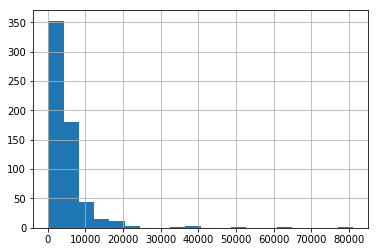

In [18]:
##################...[II] Univariate Analysis...###################
# [II] univariate Analysis is going on....
#part1 
# [A] CONTINUOUS VARIABLES
    #1) ApplicantIncome
raw['ApplicantIncome'].hist(bins=20)

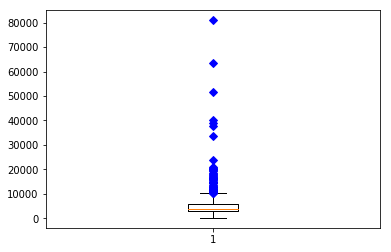

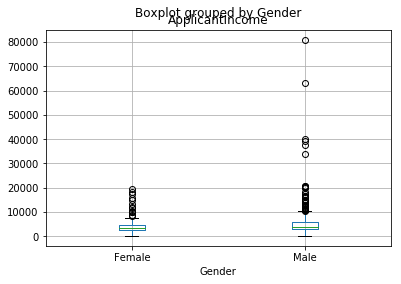

In [7]:
# Remember both types of implementing boxplot
plt.boxplot(raw['ApplicantIncome'],0, 'bD') #gD mean green Dots; rs means red Square
raw.boxplot(column = 'ApplicantIncome', by='Gender' )

In [8]:
#ApplicantIncome has many outliers as shown in histogram and boxplot 
from statistics import mode
import statistics as st
print ("mean=",np.mean(raw['ApplicantIncome']))
print ('Median =',np.median(raw['ApplicantIncome']))
print ('Mode =',mode(raw['ApplicantIncome']))
var = st.pvariance(raw['ApplicantIncome']) # np.var() also works 
stdev = st.stdev(raw['ApplicantIncome']) #np.stdev()
print ('Variance =',var)
print('Standard Deviation',stdev)

#Alternate Way

raw['ApplicantIncome'].describe()

mean= 5403.459283387622
Median = 3812.5
Mode = 2500
Variance = 37259607.772772126
Standard Deviation 6109.041673387178


count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


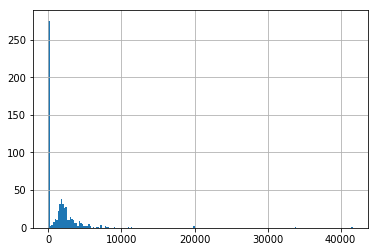

In [67]:
# [II] univariate Analysis is going on....
#part1 
# [A] CONTINUOUS VARIABLES
    #2) CoapplicantIncome
print(raw['CoapplicantIncome'].describe())
print(raw['CoapplicantIncome'].hist(bins=200))

# #print(plt.boxplot(raw['CoapplicantIncome']))

# Most of the coapplicants have 0 income which must be handled

# ther e are few outliers in coapplicant case having much higher income than the average income of the coapplicants


count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


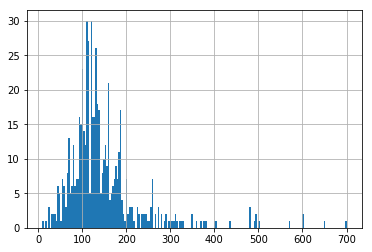

In [9]:
# [I] univariate Analysis is going on....
#part1 
# [A] CONTINUOUS VARIABLES
    #3) LoanAmount
# it has 22 missing values
print(raw['LoanAmount'].describe())
print(raw['LoanAmount'].hist(bins=200))

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object
Mode = Male
Missing Values = 13


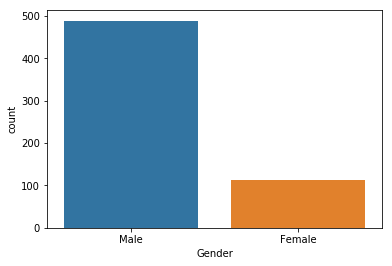

In [10]:
# [II] univariate Analysis is going on....
#part2 

#[A] CATEGORICAL VARIBALES
#1) Gender  
# There Are 13 Missing values in it

print(raw['Gender'].describe())
#plt.bar(raw['Gender'], range(len(raw['Gender'])),align='center', alpha=0.5)
print('Mode =',st.mode(raw['Gender']))
print ('Missing Values = 13')
import seaborn as sns
sns.countplot(raw['Gender'])

count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object
Mode = Yes
Missing Values = 3


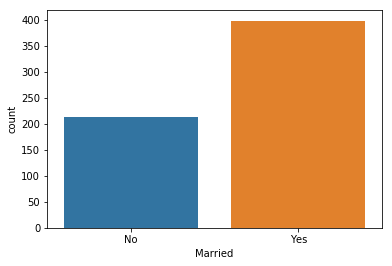

In [12]:
# [II] univariate Analysis is going on....
#part2 

#[A] CATEGORICAL VARIBALES
#2) Married
# There Are 3 Missing values in it

print(raw['Married'].describe())
print('Mode =',st.mode(raw['Married']))
print ('Missing Values = 3')
sns.countplot(raw['Married'])

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object
Mode = 0
Missing Values = 15


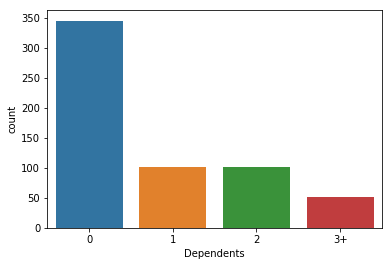

In [13]:
# [II] univariate Analysis is going on....
#part2 

#[A] CATEGORICAL VARIBALES
#3) Dependents
# There Are 15 Missing values in it

print(raw['Dependents'].describe())
print('Mode =',st.mode(raw['Dependents']))
print ('Missing Values = 15')
sns.countplot(raw['Dependents'])

# We might need to handle 3+ 

In [22]:
print('Raw Data has [614 rows x 12 columns]')


Raw Data has [614 rows x 12 columns]


count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object
Mode = Graduate
Missing Values = 0


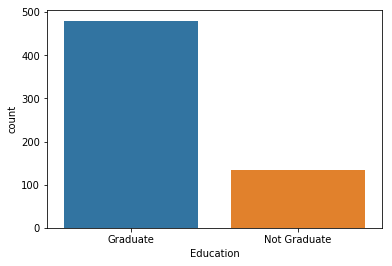

In [23]:
# [II] univariate Analysis is going on....
#part2 

#[A] CATEGORICAL VARIBALES
#4) Education
#There Are 0 Missing values in it

print(raw['Education'].describe())
print('Mode =',st.mode(raw['Education']))
print ('Missing Values = 0')
sns.countplot(raw['Education'])


count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object
Mode = No
Missing Values = 0


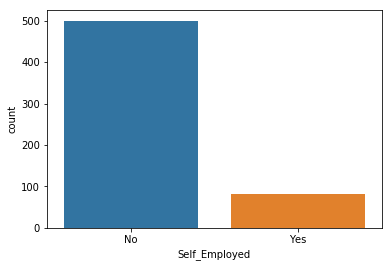

In [26]:
# [II] univariate Analysis is going on....
#part2 

#[A] CATEGORICAL VARIBALES
#5) Self_Employed
#There Are 32 Missing values in it

print(raw['Self_Employed'].describe())
print('Mode =',st.mode(raw['Self_Employed']))
print ('Missing Values = 0')
sns.countplot(raw['Self_Employed'])


count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64
Mode = 1.0
Missing Values = 50


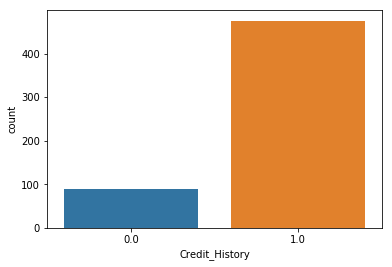

In [30]:
# [II] univariate Analysis is going on....
#part2 

#[A] CATEGORICAL VARIBALES
#6) Credit_History
#There Are 50 Missing values in it

print(raw['Credit_History'].describe())
print('Mode =',st.mode(raw['Credit_History']))
print ('Missing Values = 50')
sns.countplot(raw['Credit_History'])


count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object
Mode = Semiurban
Missing Values = 0


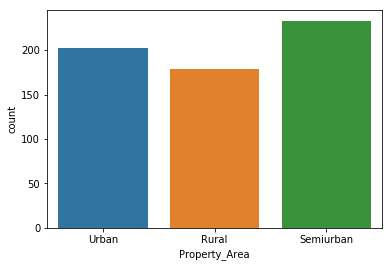

In [29]:
# [II] univariate Analysis is going on....
#part2 

#[A] CATEGORICAL VARIBALES
#7) Property_Area
#There Are 0 Missing values in it

print(raw['Property_Area'].describe())
print('Mode =',st.mode(raw['Property_Area']))
print ('Missing Values = 0')
sns.countplot(raw['Property_Area'])


count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object
Mode = Y
Missing Values = 0


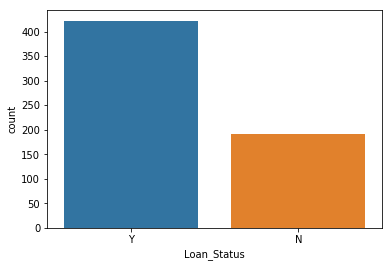

In [31]:
# [II] univariate Analysis is going on....
#part2 

#[A] CATEGORICAL VARIBALES
#8) Loan_Status [LABEL/TARGET/OUTPUT]
#There Are 0 Missing values in it

print(raw['Loan_Status'].describe())
print('Mode =',st.mode(raw['Loan_Status']))
print ('Missing Values = 0')
sns.countplot(raw['Loan_Status'])


count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64
Mode = 360.0
Missing Values = 14


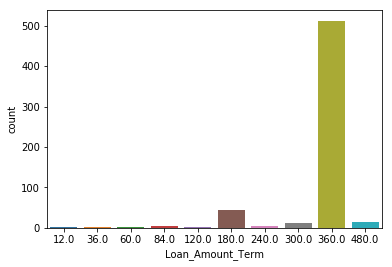

In [222]:
# [II] univariate Analysis is going on....
#part2 

#[A] CATEGORICAL VARIBALES
#9) Loan_Amount_Term
#There Are 14 Missing values in it

print(raw['Loan_Amount_Term'].describe())
print('Mode =',st.mode(raw['Loan_Amount_Term']))
print ('Missing Values = 14')
sns.countplot(raw['Loan_Amount_Term'])
# with bar chart how will you find out outliers 
#therfore use boxplot instead of countplot or bar-count plot


In [ ]:
######################...[III] BIVARIATE VARIABLE ANALYSIS...####################
#[A] CATEGORICAL VARIBALES & CATEGORICAL VARIABLES
#[B] CONTINUOUS VARIABLES & CONTINUOUS VARIABLES
#[C] CATEGORICAL VARIABLES & CONTINUOUS VARIABLES



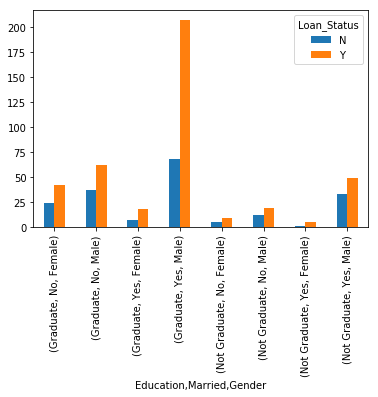

In [250]:
#[III] BIVARIATE VARIABLE ANALYSIS is going on...
#[A] CATEGORICAL VARIBALES & CATEGORICAL VARIABLES

tem = pd.crosstab(index=[raw['Education'], raw['Married'], raw['Gender']], columns=raw['Loan_Status'])
tem.plot.bar()


In [286]:
#[III] BIVARIATE VARIABLE ANALYSIS is going on...
#[A] CATEGORICAL VARIBALES & CATEGORICAL VARIABLES is going on...
from scipy.stats import chisquare
print(chisquare(pd.crosstab(index=raw['Gender'], columns="count"), axis=None))
print(chisquare( pd.crosstab(index=raw['Gender'], columns=raw['Education']), axis=None))
print(chisquare(pd.crosstab(index=raw['Gender'],columns=raw['Married']), axis=None))


Power_divergenceResult(statistic=236.4875207986689, pvalue=2.2940657955698367e-53)
Power_divergenceResult(statistic=483.9184692179701, pvalue=1.4576740169902883e-104)
Power_divergenceResult(statistic=416.7826086956522, pvalue=5.125539599882289e-90)


In [291]:
#[III] BIVARIATE VARIABLE ANALYSIS is going on...
#[A] CATEGORICAL VARIBALES & CATEGORICAL VARIABLES is going on...
#Chi-Square analysis using class

import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

df = raw


#Initialize ChiSquare Class
cT = ChiSquare(df)

#Feature Selection
testColumns = ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Amount_Term']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="Loan_Status" )  

Gender is NOT an important predictor. (Discard Gender from model)
Married is IMPORTANT for Prediction
Education is IMPORTANT for Prediction
Self_Employed is NOT an important predictor. (Discard Self_Employed from model)
Credit_History is IMPORTANT for Prediction
Property_Area is IMPORTANT for Prediction
Loan_Amount_Term is NOT an important predictor. (Discard Loan_Amount_Term from model)


In [ ]:
#[III] BIVARIATE VARIABLE ANALYSIS is going on...
#[A] CATEGORICAL VARIBALES & CATEGORICAL VARIABLES is going on...

# NOTE::::::::::::::::::::::
#For two nominal variables a Cramer's V or contingency coefficient are preferred measures 
#For two ordinal variables, a Spearman correlation or Mantel-Haenszed Chi-Square(NOT YET FOUND IN PYTHON) are preferable over Cramér’s V.
#For two metric variables, a Pearson correlation is the preferred measure.
#If both variables are dichotomous (resulting in a 2 by 2 table) use a phi coefficient, which is simply a Pearson correlation computed on dichotomous variables.


In [ ]:
#[III] BIVARIATE VARIABLE ANALYSIS is going on...
#[A] CATEGORICAL VARIBALES & CATEGORICAL VARIABLES is going on...
####### For NOMINAL Categorical variables###
#1)Phi Coefficient
    #A measure of association used for 2 x 2 tables is the Phi coefficient:
    #Again, the measure ranges between 0 and 1 with higher values meaning a stronger association.
    # Phi = squareroot(chi-square^2 / N) where N is number of samples
    
    
#2)Cramer’s V
    #When the crosstabulation table is larger than 2 x 2, Cramer’s V is the best choice:
    #Here, N is the sample size and k is the smaller of the number of rows or columns (so it would be 3 for a 3 x 4 table).
    # V = squareroot( chi-square^2 / N(k-1) )
    
    
#3) Contingency Coefficient
    #The contingency coefficient is an adjustment to phi coefficient, intended to adapt it to tables larger than 2-by-2.
    #The contingency coefficient is computed as the square root of chi-square divided by chi-square plus n, the sample size.
    #The contingency coefficient will be always less than 1 and will be approaching 1.0 only for large tables.
    #The larger the contingency coefficient the stronger the association. 
    #Some researchers recommend it only for 5-by-5 tables or larger. 
    #For smaller tables it will underestimated the level of association.
    #CC = squareroot( chi-square^2 / (N + chi-square^2) )

In [ ]:
#[III] BIVARIATE VARIABLE ANALYSIS is going on...
#[A] CATEGORICAL VARIBALES & CATEGORICAL VARIABLES is going on...
####### For ORDINAL Categorical variables###

    #1) Mantel-Haenszed Chi-Square
    
    #2) Spearman Correlation : scipy.stats.spearmanr(pd.crosstab(data['x'],data['y']), axis=0); 
    #returns Spearman correlation matrix or correlation coefficient (-1 to +1)and p-value

In [309]:
#[III] BIVARIATE VARIABLE ANALYSIS is going on...
#[A] CATEGORICAL VARIBALES & CATEGORICAL VARIABLES is going on...
# Spearman Correlation
from scipy.stats import spearmanr
y=pd.crosstab(raw['Education'],raw['Loan_Amount_Term'])

spearmanr(y, axis=1)

SpearmanrResult(correlation=0.7874960547832, pvalue=0.0068419269413775765)

In [327]:
#[III] BIVARIATE VARIABLE ANALYSIS is going on...
#[A] CATEGORICAL VARIBALES & CATEGORICAL VARIABLES is going on...
#Cramer's V
y=pd.crosstab(raw['Gender'],raw['Loan_Status'])
chi2, p, dof, expected = stats.chi2_contingency(y)
print('Chi-sqaure',chi2)
print('P-value',p)
print('Degree of freedom',dof)
print('Expected matrix:\n',expected)
n =sum(y.shape)
print('Sample Size N =',n)
V=np.sqrt(chi2 / (n*(min(y.shape)-1)))
print('Cramers V =',V) # varies from 0 to 1 for nominal variables; 0.15 is closer to zero means independent variables


Chi-sqaure 0.09293271015071065
P-value 0.7604814131696612
Degree of freedom 1
Expected matrix:
 [[ 94.74918567 208.25081433]
 [ 97.25081433 213.74918567]]
Sample Size N = 4
Cramers V = 0.15242433381083764


/home/ashu6811/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ashu6811/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


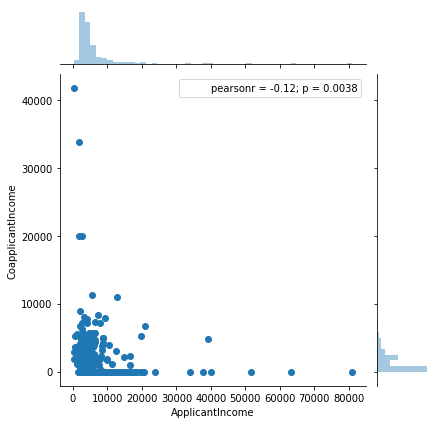

In [72]:
#[III] BIVARIATE VARIABLE ANALYSIS is going on...
#[B] CONTINUOUS VARIABLES & CONTINUOUS VARIABLES
    #1)  ApplicantIncome & CoapplicantIncome
sns.jointplot(x='ApplicantIncome', y='CoapplicantIncome', data =raw, kind='scatter') #using seaborn; kind must be either 'scatter', 'reg', 'resid', 'kde', or 'hex'

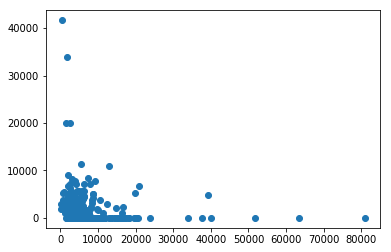

In [42]:
plt.scatter(raw['ApplicantIncome'], raw['CoapplicantIncome']) #using matplotlib

In [74]:
# corelation coefficient and Covariance 
cor_value = raw['ApplicantIncome'].corr(raw['CoapplicantIncome']) # using Pandas; =raw['CoapplicantIncome'].corr(raw['ApplicantIncome'])
cor_matrix = np.corrcoef(raw['ApplicantIncome'], raw['CoapplicantIncome']) #  Using Numpy; to print corelation coefficient matrix R_{ij} = \frac{ C_{ij} } { \sqrt{ C_{ii} * C_{jj} } }
cov_matrix = np.cov(raw['ApplicantIncome'],raw['CoapplicantIncome'])
cov_value = raw['ApplicantIncome'].cov(raw['CoapplicantIncome'])

print ('Corelation Coefficient =', cor_value)
print ('Corelation Coefficient Matrix: \n', cor_matrix)
print('Covariance =', cov_value)
print('Covariance Matrix: \n', cov_matrix)

# np.var(), np.stdev(), np.mean(),np.median() ,st.mode() where numpy as np : where statistics as st
# corelation Coefficient range from -1 to +1
# therfore as the value is -0.12 which is close to zero; hence very low dependency of variables on each other
# similar is seen in the scatter plot graph : slightly negative but very far away from negative linearity.


Corelation Coefficient = -0.11660458122889966
Corelation Coefficient Matrix: 
 [[ 1.         -0.11660458]
 [-0.11660458  1.        ]]
Covariance = -2084490.3357900244
Covariance Matrix: 
 [[37320390.16718121 -2084490.33579002]
 [-2084490.33579002  8562929.51838722]]


In [ ]:
#[III] BIVARIATE VARIABLE ANALYSIS is going on...
#[B] CONTINUOUS VARIABLES & CONTINUOUS VARIABLES
    #2)  ApplicantIncome & LoanAmount


In [ ]:
#[III] BIVARIATE VARIABLE ANALYSIS is going on...
#[B] CONTINUOUS VARIABLES & CONTINUOUS VARIABLES
    #3)  CoapplicantIncome & LoanAmount

Corelation Coefficient Matrix:
                    ApplicantIncome  CoapplicantIncome  LoanAmount
ApplicantIncome           1.000000          -0.116605    0.570909
CoapplicantIncome        -0.116605           1.000000    0.188619
LoanAmount                0.570909           0.188619    1.000000


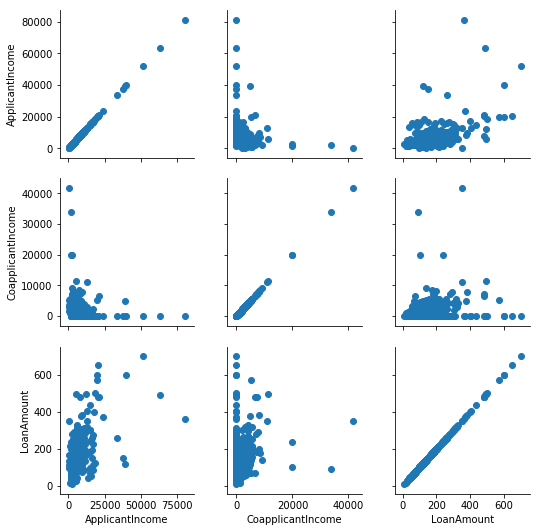

In [99]:
#[III] BIVARIATE VARIABLE ANALYSIS is going on...
#[B] CONTINUOUS VARIABLES & CONTINUOUS VARIABLES
    #1, 2, 3)  ApplicantIncome & CoapplicantIncome & LoanAmount
grids = sns.PairGrid(data = raw,  vars = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount'])
grids.map(plt.scatter)

print('Corelation Coefficient Matrix:\n',raw.drop(['Loan_Amount_Term','Credit_History'], axis = 1).corr()) # correlation matrix

# as seen in graphs and corelation matrix only dependency of positive linearity exists between LoanAmount and Applicant Income.

Corelation Coefficient Value of Total Income with Loan Amount = 0.6246206959984655


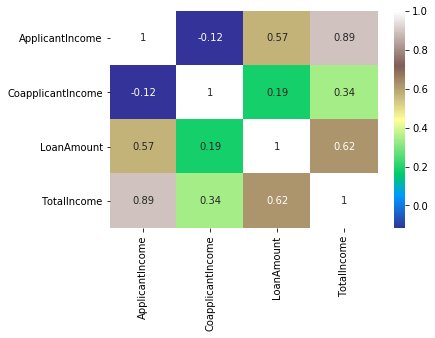

In [113]:
Temp_TotalIncome = raw['ApplicantIncome'] + raw['CoapplicantIncome']
Temp_TotalIncome.corr(raw['LoanAmount'])
print('Corelation Coefficient Value of Total Income with Loan Amount =', Temp_TotalIncome.corr(raw['LoanAmount']) )

# As the corr_coef for the total income increases but doesn't increase drastically
plt.scatter(Temp_TotalIncome, raw['LoanAmount'])
# let us add new attribute to the dataframe for better accuracy
raw['TotalIncome']= Temp_TotalIncome
raw.apply(lambda x: sum(x.isnull()), axis =0)
sns.heatmap(raw.drop(['Loan_Amount_Term','Credit_History'], axis = 1).corr(), annot=True , cmap='terrain')

In [ ]:
#[III] BIVARIATE VARIABLE ANALYSIS is going on...
#[C] CATEGORICAL VARIABLES & CONTINUOUS VARIABLES
    #While exploring relation between categorical and continuous variables, we can draw box plots for each level of categorical variables.
    #If levels are small in number, it will not show the statistical significance.
    #To look at the statistical significance we can perform Z-test, T-test or ANOVA.
    
    #1) Z-test/T-test:
    #Either test assess whether mean of two groups are statistically different from each other or not.
    #If the probability of Z is small then the difference of two averages is more significant. 
    #The T-test is very similar to Z-test but it is used when number of observation for both categories is less than 30.
    
    
    #2) ANOVA:
    #It assesses whether the average of more than two groups is statistically different.
    
    
    
#sns.boxplot(x='LoanAmount', y='Education' ,data=raw)
#raw.boxplot(column=['LoanAmount','TotalIncome'], by=['Education', 'Gender'] )
#sns.barplot(x='Gender',y='LoanAmount', data=raw) # or sns.barplot(raw['Gender'],raw['LoanAmount'])

In [328]:
# Z-test (number of rows >30)
y=pd.crosstab(raw['Gender'],raw['Loan_Status'])
chi2, p, dof, expected = stats.chi2_contingency(y)
print('Chi-sqaure',chi2)
print('P-value',p)
print('Degree of freedom',dof)
print('Expected matrix:\n',expected)


Z=chi2**0.5
Z

z1, p_value1 = sm.stats.proportions_ztest([s1, s2], [n1, n2])

Chi-sqaure 0.09293271015071065
P-value 0.7604814131696612
Degree of freedom 1
Expected matrix:
 [[ 94.74918567 208.25081433]
 [ 97.25081433 213.74918567]]


0.3048486676216753

In [ ]:
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
dtype: int64
    
#VARIABLE CATEGORY
# [A] Categorical 
 #1) Gender 
 #2) Married
 #3) Dependents
 #4) Education
 #5) Self_Employed
 #6) Credit_History *int
 #7) Property_Area
 #8) Loan_Status [LABEL/TARGET/OUTPUT]
 #9) Loan_Amount_Term *float

# [B] Continuous 
 #1) ApplicantIncome
 #2) CoapplicantIncome
 #3) LoanAmount
 #4) TotalIncome [New = ApplicantIncome + CoapplicantIncome]